# Comparisons In A Given Loss Landscape

In [1]:
import os
import json
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

from minima_volume.analysis_funcs import (  grab_folder_names,
                                            load_base_train_size,
                                            list_additional_data,
                                            load_param_num,
                                            multiple_minima_fixed_landscape,
                                            fixed_landscape_minima_labels,
                                            plot_fixed_landscape_minima_pair,
                                            plot_perturb_probs,
                                            model_volume_across_targets,
                                            append_cutoff_points,
                                            varying_landscape_minima_labels,
                                            plot_minima_volume_vs_data_level,  
                                            save_results_dict_npz,
)

problem_name = "CIFAR10"

loss_value = 0.1  # Loss value to analyze
data_level_log = False #Is the data log distributed?
base_output_dir = "analysis"  # Root folder to save all plots
os.makedirs(base_output_dir, exist_ok=True)

# Data for the loss landscape levels
experiment_folders, data_modifications = grab_folder_names()

base_train_size = load_base_train_size(experiment_folders[0])
model_data_sizes = list_additional_data(experiment_folders[0])
num_params = load_param_num(experiment_folders[0], data_modifications[0], loss_value = loss_value)

base_shift = 0
if data_modifications[0].startswith("data_"):
    base_shift = base_train_size  # Shift to reflect true dataset size

print("Experiment folders: ", experiment_folders)
print("Different data levels where loss landscapes were computed:", data_modifications)
print("The base train size is: ", base_train_size)
print("Data levels where models were trained: ", model_data_sizes)
print("The number of model parameters is ", num_params)

First entry: Model_0, base_train_size = 50
Experiment folders:  ['model_0_data_10', 'model_1_data_11', 'model_2_data_12', 'model_3_data_13', 'model_4_data_14', 'model_5_data_15', 'model_6_data_16', 'model_7_data_17', 'model_8_data_18', 'model_9_data_19']
Different data levels where loss landscapes were computed: ['data_0', 'data_1950', 'data_19950', 'data_450', 'data_4950', 'data_49950']
The base train size is:  50
Data levels where models were trained:  [0, 1950, 19950, 450, 4950, 49950]
The number of model parameters is  1707274


## Plotting Different Model Volumes In A Landscape

In [2]:
# Needed for fixed colors for background plots
import matplotlib as mpl

#cmap = mpl.colormaps.get_cmap("winter")  # blue → green
#background_colors = [cmap(i) for i in np.linspace(0, 1, 10)]

#natural_label = "Minima (On Base Dataset)"
if data_modifications[0].startswith("data_"):
    other_label = "Minima (Larger Datasets)"
else:
    other_label = "Minima (Poisoned Datasets)"


Processing data modification folder: data_0
Saved data to analysis\data_0\minima_data.npz
⚠️ Inf detected in y_vals: [8174320.47146232 7551774.76435464 6791305.20350936 6427798.73178839
 5319051.40710885             -inf]
⚠️ Inf detected in y_vals: [8174525.29801192 7551225.99501947 6790078.05777321 6430266.60295988
             -inf 4422922.0113134 ]
⚠️ Inf detected in y_vals: [8174744.28380966 7410883.6641929  6787663.09523184 6234959.05524019
 5572114.49565696             -inf]
⚠️ Inf detected in y_vals: [8172269.89568561 7410979.86892586 6790130.17602522 6426229.57522496
             -inf             -inf]
⚠️ Inf detected in y_vals: [8058898.31301582 7550113.72586041 6956788.85018728 6235424.60860782
 5573049.07094752             -inf]
⚠️ Inf detected in y_vals: [8173102.32190951 7552490.8327609  6956055.24984524 6612909.56481131
 5571269.97416832             -inf]
⚠️ Inf detected in y_vals: [8173945.02515525 7551760.89583231 6789704.25793649 6429251.30301536
 5571234.89001499    

L:\Programming\diffusion-env\Lib\site-packages\numpy\core\_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


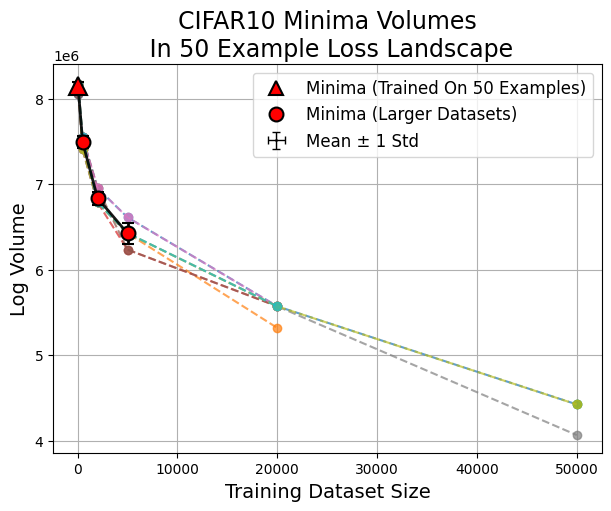

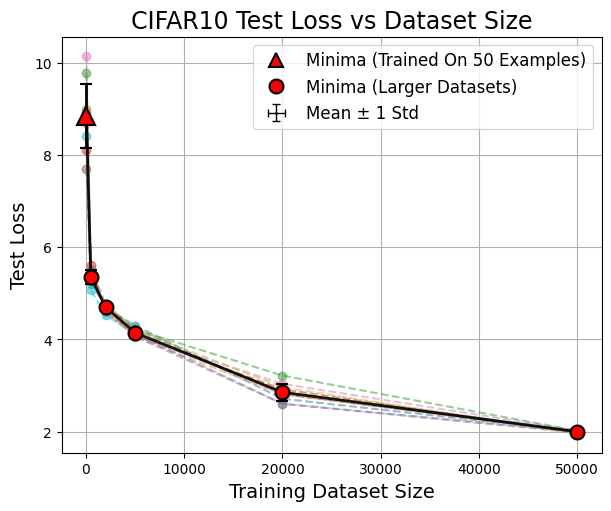

⚠️ Inf detected in x_vals: [8174320.47146232 7551774.76435464 6791305.20350936 6427798.73178839
 5319051.40710885             -inf]
⚠️ Inf detected in x_vals: [8174525.29801192 7551225.99501947 6790078.05777321 6430266.60295988
             -inf 4422922.0113134 ]
⚠️ Inf detected in x_vals: [8174744.28380966 7410883.6641929  6787663.09523184 6234959.05524019
 5572114.49565696             -inf]
⚠️ Inf detected in x_vals: [8172269.89568561 7410979.86892586 6790130.17602522 6426229.57522496
             -inf             -inf]
⚠️ Inf detected in x_vals: [8058898.31301582 7550113.72586041 6956788.85018728 6235424.60860782
 5573049.07094752             -inf]
⚠️ Inf detected in x_vals: [8173102.32190951 7552490.8327609  6956055.24984524 6612909.56481131
 5571269.97416832             -inf]
⚠️ Inf detected in x_vals: [8173945.02515525 7551760.89583231 6789704.25793649 6429251.30301536
 5571234.89001499             -inf]


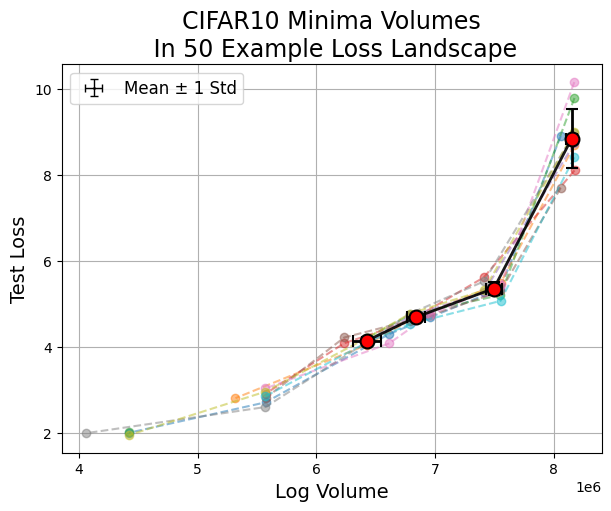

⚠️ Inf detected in y_vals: [8174320.47146232 7551774.76435464 6791305.20350936 6427798.73178839
 5319051.40710885             -inf]
⚠️ Inf detected in y_vals: [8174525.29801192 7551225.99501947 6790078.05777321 6430266.60295988
             -inf 4422922.0113134 ]
⚠️ Inf detected in y_vals: [8174744.28380966 7410883.6641929  6787663.09523184 6234959.05524019
 5572114.49565696             -inf]
⚠️ Inf detected in y_vals: [8172269.89568561 7410979.86892586 6790130.17602522 6426229.57522496
             -inf             -inf]
⚠️ Inf detected in y_vals: [8058898.31301582 7550113.72586041 6956788.85018728 6235424.60860782
 5573049.07094752             -inf]
⚠️ Inf detected in y_vals: [8173102.32190951 7552490.8327609  6956055.24984524 6612909.56481131
 5571269.97416832             -inf]
⚠️ Inf detected in y_vals: [8173945.02515525 7551760.89583231 6789704.25793649 6429251.30301536
 5571234.89001499             -inf]


L:\Programming\diffusion-env\Lib\site-packages\numpy\lib\function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
L:\Programming\diffusion-env\Lib\site-packages\matplotlib\axes\_axes.py:3803: RuntimeWarning: invalid value encountered in add
  low, high = dep + np.vstack([-(1 - lolims), 1 - uplims]) * err


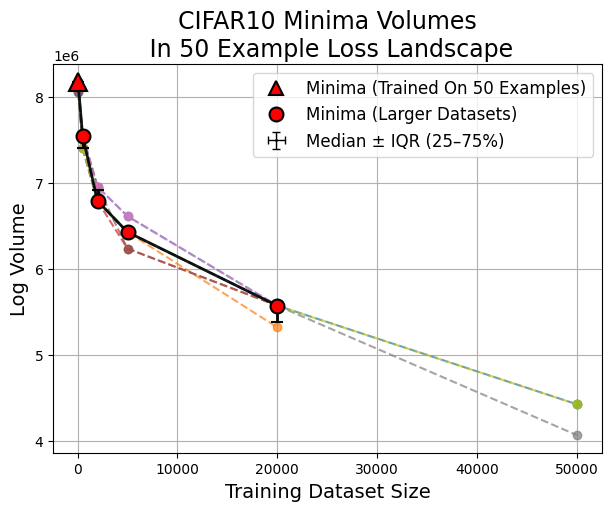

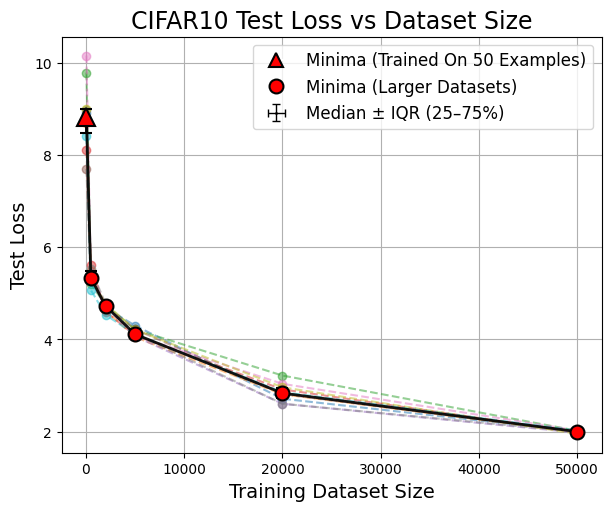

⚠️ Inf detected in x_vals: [8174320.47146232 7551774.76435464 6791305.20350936 6427798.73178839
 5319051.40710885             -inf]
⚠️ Inf detected in x_vals: [8174525.29801192 7551225.99501947 6790078.05777321 6430266.60295988
             -inf 4422922.0113134 ]
⚠️ Inf detected in x_vals: [8174744.28380966 7410883.6641929  6787663.09523184 6234959.05524019
 5572114.49565696             -inf]
⚠️ Inf detected in x_vals: [8172269.89568561 7410979.86892586 6790130.17602522 6426229.57522496
             -inf             -inf]
⚠️ Inf detected in x_vals: [8058898.31301582 7550113.72586041 6956788.85018728 6235424.60860782
 5573049.07094752             -inf]
⚠️ Inf detected in x_vals: [8173102.32190951 7552490.8327609  6956055.24984524 6612909.56481131
 5571269.97416832             -inf]
⚠️ Inf detected in x_vals: [8173945.02515525 7551760.89583231 6789704.25793649 6429251.30301536
 5571234.89001499             -inf]


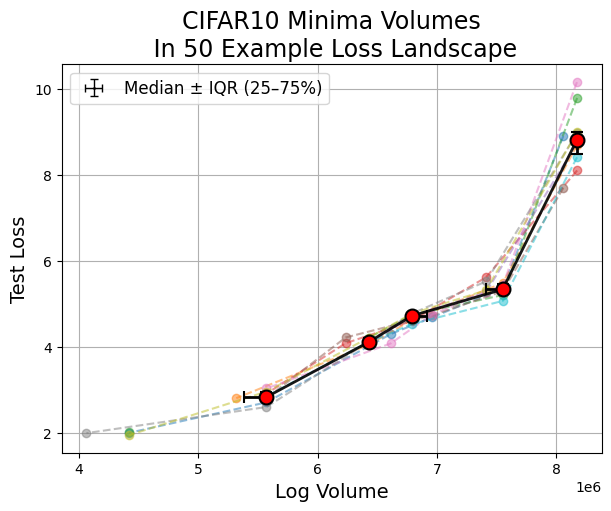


Processing data modification folder: data_1950
Saved data to analysis\data_1950\minima_data.npz
⚠️ Inf detected in y_vals: [6430864.37171453 6027671.20702447             -inf 2680282.27244384]
⚠️ Inf detected in y_vals: [6430714.74996062 6027820.2671764  5046492.48252578             -inf]
⚠️ Inf detected in y_vals: [6613812.3589227  6028418.92743376             -inf             -inf]
⚠️ Inf detected in y_vals: [6430972.55648629 6028418.92743376 5045786.52899937             -inf]
⚠️ Inf detected in y_vals: [6614094.63337047 6028688.5428801  5046787.84462181             -inf]
⚠️ Inf detected in y_vals: [6615213.54379302 6028258.44459958 5046694.17544472             -inf]


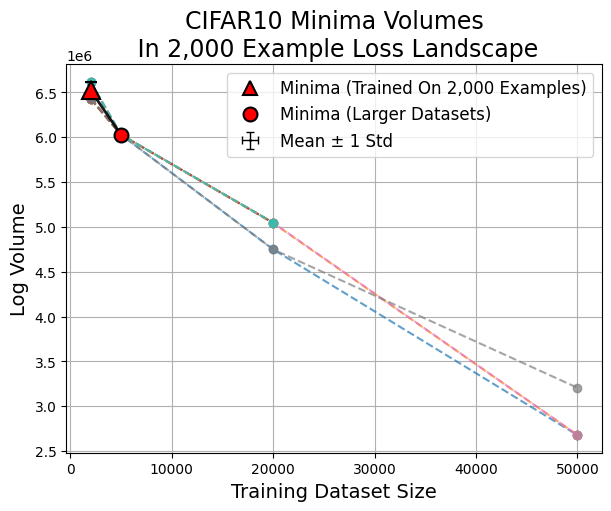

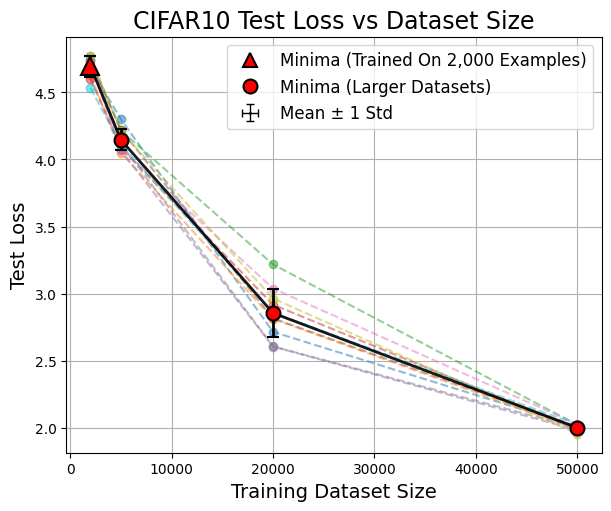

⚠️ Inf detected in x_vals: [6430864.37171453 6027671.20702447             -inf 2680282.27244384]
⚠️ Inf detected in x_vals: [6430714.74996062 6027820.2671764  5046492.48252578             -inf]
⚠️ Inf detected in x_vals: [6613812.3589227  6028418.92743376             -inf             -inf]
⚠️ Inf detected in x_vals: [6430972.55648629 6028418.92743376 5045786.52899937             -inf]
⚠️ Inf detected in x_vals: [6614094.63337047 6028688.5428801  5046787.84462181             -inf]
⚠️ Inf detected in x_vals: [6615213.54379302 6028258.44459958 5046694.17544472             -inf]


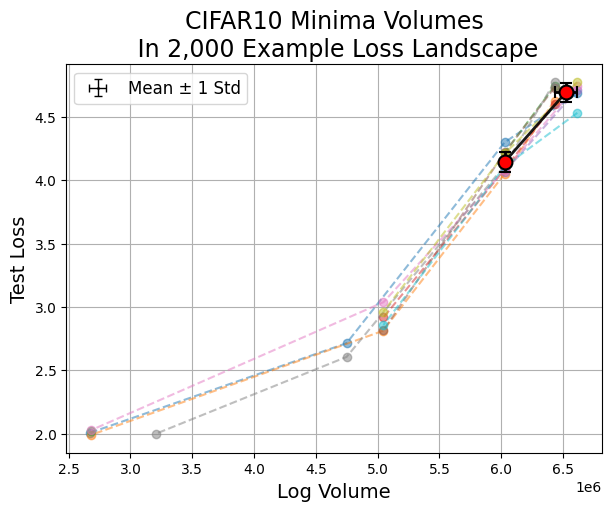

⚠️ Inf detected in y_vals: [6430864.37171453 6027671.20702447             -inf 2680282.27244384]
⚠️ Inf detected in y_vals: [6430714.74996062 6027820.2671764  5046492.48252578             -inf]
⚠️ Inf detected in y_vals: [6613812.3589227  6028418.92743376             -inf             -inf]
⚠️ Inf detected in y_vals: [6430972.55648629 6028418.92743376 5045786.52899937             -inf]
⚠️ Inf detected in y_vals: [6614094.63337047 6028688.5428801  5046787.84462181             -inf]
⚠️ Inf detected in y_vals: [6615213.54379302 6028258.44459958 5046694.17544472             -inf]


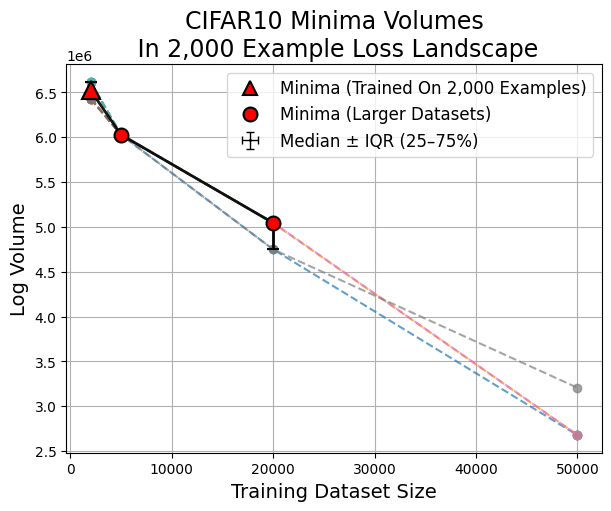

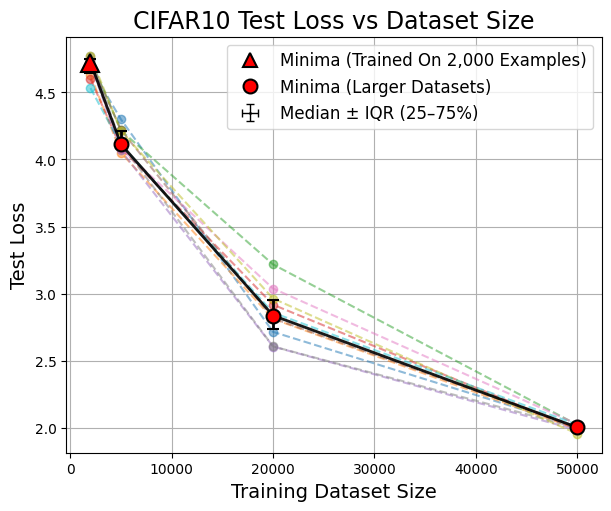

⚠️ Inf detected in x_vals: [6430864.37171453 6027671.20702447             -inf 2680282.27244384]
⚠️ Inf detected in x_vals: [6430714.74996062 6027820.2671764  5046492.48252578             -inf]
⚠️ Inf detected in x_vals: [6613812.3589227  6028418.92743376             -inf             -inf]
⚠️ Inf detected in x_vals: [6430972.55648629 6028418.92743376 5045786.52899937             -inf]
⚠️ Inf detected in x_vals: [6614094.63337047 6028688.5428801  5046787.84462181             -inf]
⚠️ Inf detected in x_vals: [6615213.54379302 6028258.44459958 5046694.17544472             -inf]


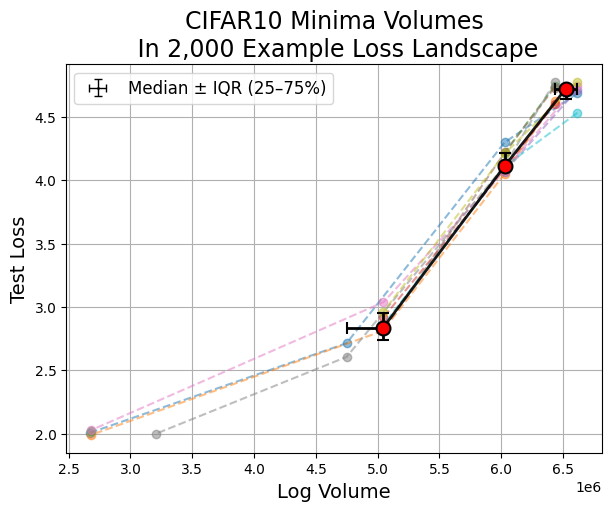


Processing data modification folder: data_19950
Saved data to analysis\data_19950\minima_data.npz
⚠️ Inf detected in y_vals: [            -inf 2057736.56533616]
⚠️ Inf detected in y_vals: [-inf -inf]
⚠️ Inf detected in y_vals: [5045786.52899937             -inf]
⚠️ Inf detected in y_vals: [5046787.84462181             -inf]
⚠️ Inf detected in y_vals: [5046694.17544472             -inf]


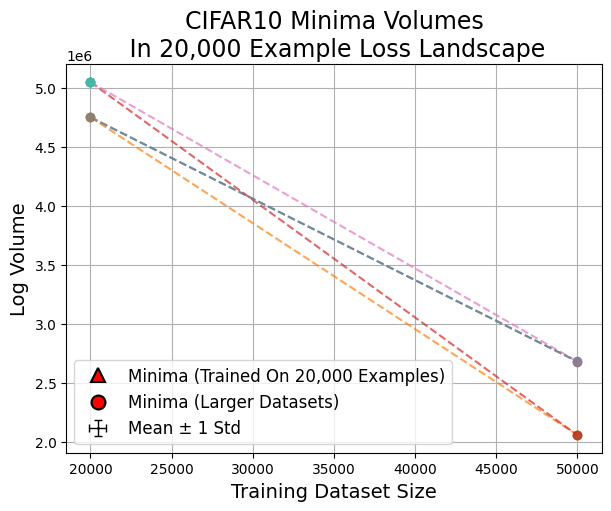

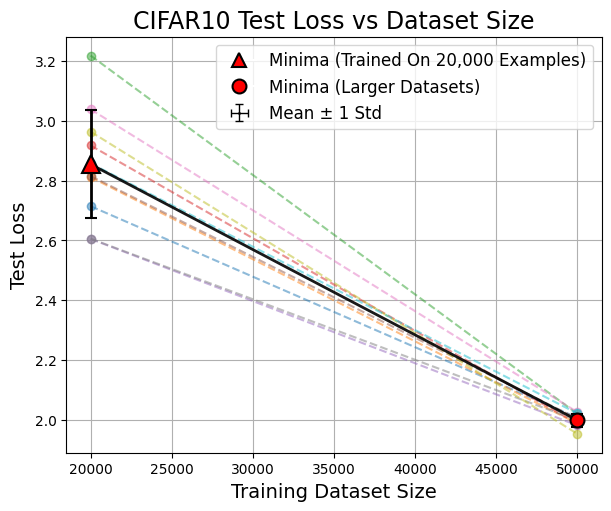

⚠️ Inf detected in x_vals: [            -inf 2057736.56533616]
⚠️ Inf detected in x_vals: [-inf -inf]
⚠️ Inf detected in x_vals: [5045786.52899937             -inf]
⚠️ Inf detected in x_vals: [5046787.84462181             -inf]
⚠️ Inf detected in x_vals: [5046694.17544472             -inf]


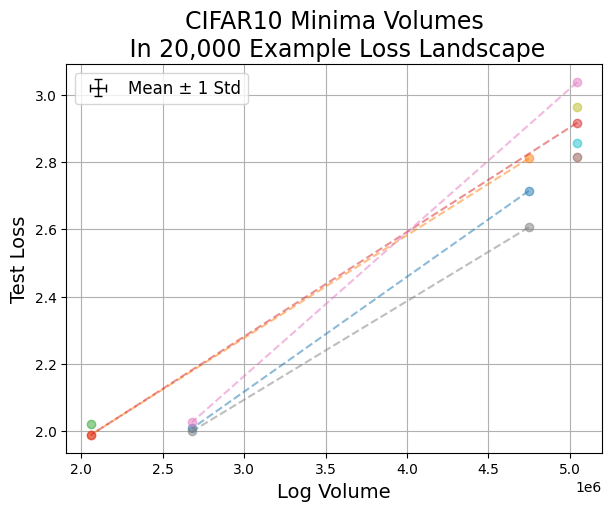

⚠️ Inf detected in y_vals: [            -inf 2057736.56533616]
⚠️ Inf detected in y_vals: [-inf -inf]
⚠️ Inf detected in y_vals: [5045786.52899937             -inf]
⚠️ Inf detected in y_vals: [5046787.84462181             -inf]
⚠️ Inf detected in y_vals: [5046694.17544472             -inf]


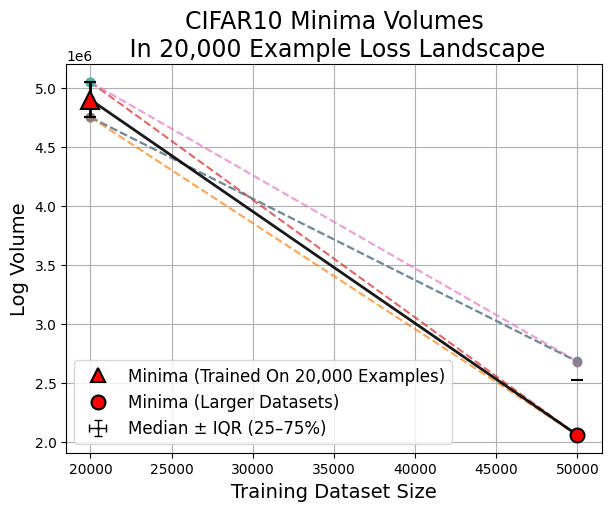

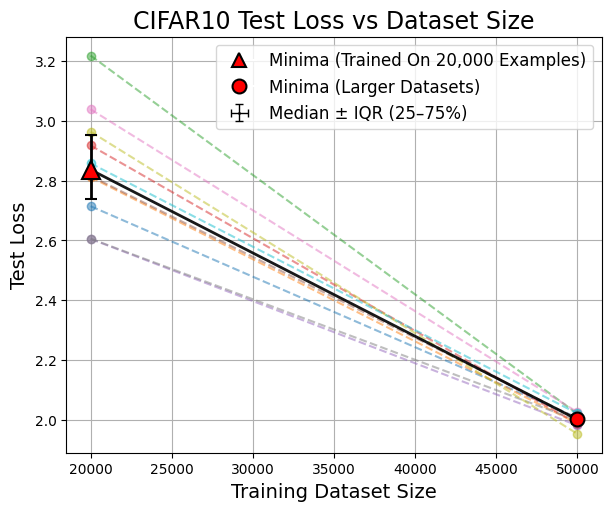

⚠️ Inf detected in x_vals: [            -inf 2057736.56533616]
⚠️ Inf detected in x_vals: [-inf -inf]
⚠️ Inf detected in x_vals: [5045786.52899937             -inf]
⚠️ Inf detected in x_vals: [5046787.84462181             -inf]
⚠️ Inf detected in x_vals: [5046694.17544472             -inf]


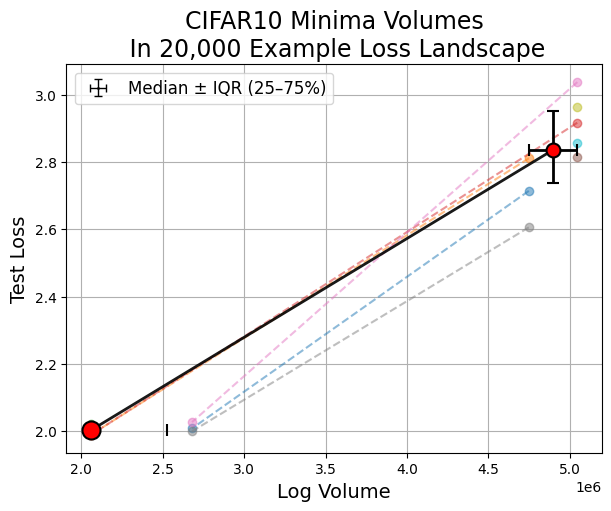


Processing data modification folder: data_450
Saved data to analysis\data_450\minima_data.npz
⚠️ Inf detected in y_vals: [7266734.89033057 6613391.7312598  6028688.5428801              -inf
 3661458.02858697]
⚠️ Inf detected in y_vals: [7116172.27833519 6430714.74996062 6027820.2671764  5046492.48252578
             -inf]
⚠️ Inf detected in y_vals: [7267488.07066236 6614291.24104581 6028418.92743376             -inf
             -inf]
⚠️ Inf detected in y_vals: [7266319.50274082 6615049.07693845 6028418.92743376 5046492.48252578
             -inf]
⚠️ Inf detected in y_vals: [7267954.9553179  6613607.24210976 6028622.09905523 5047066.59153045
             -inf]
⚠️ Inf detected in y_vals: [7267143.48208148 6615213.54379302 6028258.44459958 5046694.17544472
             -inf]


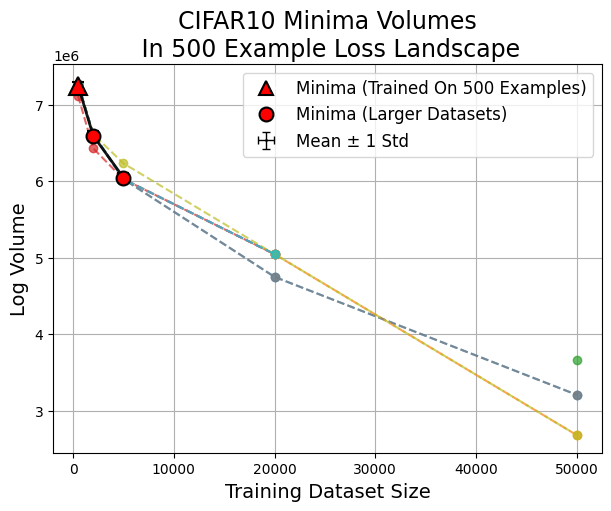

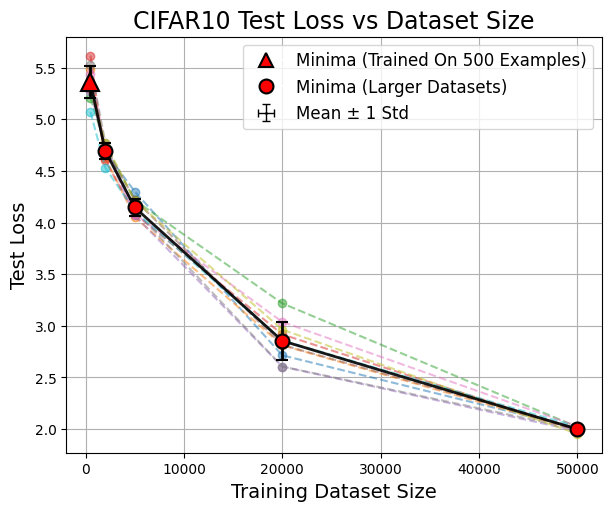

⚠️ Inf detected in x_vals: [7266734.89033057 6613391.7312598  6028688.5428801              -inf
 3661458.02858697]
⚠️ Inf detected in x_vals: [7116172.27833519 6430714.74996062 6027820.2671764  5046492.48252578
             -inf]
⚠️ Inf detected in x_vals: [7267488.07066236 6614291.24104581 6028418.92743376             -inf
             -inf]
⚠️ Inf detected in x_vals: [7266319.50274082 6615049.07693845 6028418.92743376 5046492.48252578
             -inf]
⚠️ Inf detected in x_vals: [7267954.9553179  6613607.24210976 6028622.09905523 5047066.59153045
             -inf]
⚠️ Inf detected in x_vals: [7267143.48208148 6615213.54379302 6028258.44459958 5046694.17544472
             -inf]


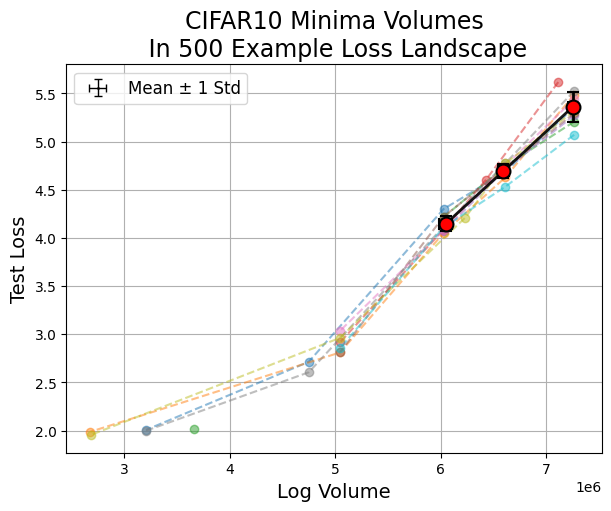

⚠️ Inf detected in y_vals: [7266734.89033057 6613391.7312598  6028688.5428801              -inf
 3661458.02858697]
⚠️ Inf detected in y_vals: [7116172.27833519 6430714.74996062 6027820.2671764  5046492.48252578
             -inf]
⚠️ Inf detected in y_vals: [7267488.07066236 6614291.24104581 6028418.92743376             -inf
             -inf]
⚠️ Inf detected in y_vals: [7266319.50274082 6615049.07693845 6028418.92743376 5046492.48252578
             -inf]
⚠️ Inf detected in y_vals: [7267954.9553179  6613607.24210976 6028622.09905523 5047066.59153045
             -inf]
⚠️ Inf detected in y_vals: [7267143.48208148 6615213.54379302 6028258.44459958 5046694.17544472
             -inf]


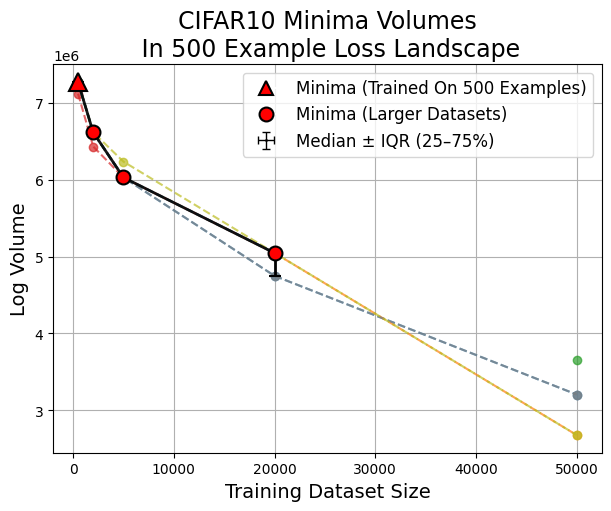

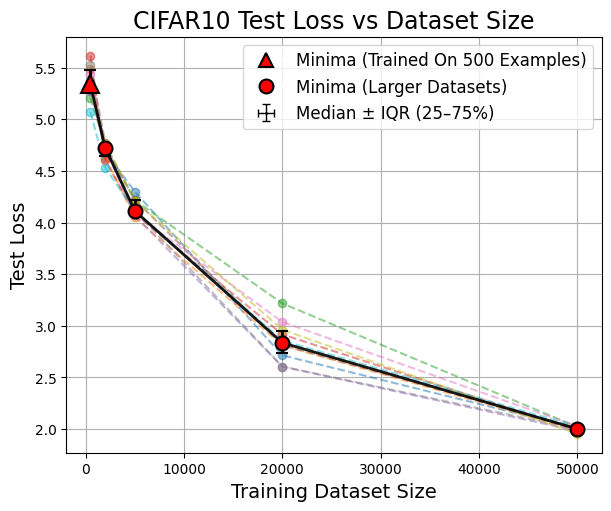

⚠️ Inf detected in x_vals: [7266734.89033057 6613391.7312598  6028688.5428801              -inf
 3661458.02858697]
⚠️ Inf detected in x_vals: [7116172.27833519 6430714.74996062 6027820.2671764  5046492.48252578
             -inf]
⚠️ Inf detected in x_vals: [7267488.07066236 6614291.24104581 6028418.92743376             -inf
             -inf]
⚠️ Inf detected in x_vals: [7266319.50274082 6615049.07693845 6028418.92743376 5046492.48252578
             -inf]
⚠️ Inf detected in x_vals: [7267954.9553179  6613607.24210976 6028622.09905523 5047066.59153045
             -inf]
⚠️ Inf detected in x_vals: [7267143.48208148 6615213.54379302 6028258.44459958 5046694.17544472
             -inf]


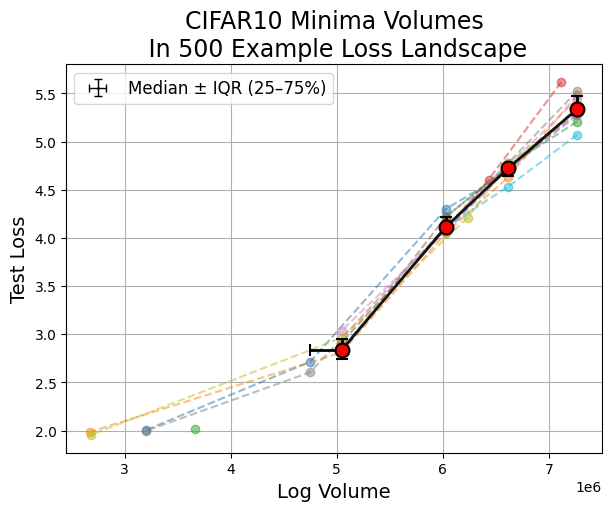


Processing data modification folder: data_4950
Saved data to analysis\data_4950\minima_data.npz
⚠️ Inf detected in y_vals: [6026969.25371825             -inf 2680282.27244384]
⚠️ Inf detected in y_vals: [6026403.59023237 5046647.81685904             -inf]
⚠️ Inf detected in y_vals: [6028418.92743376             -inf             -inf]
⚠️ Inf detected in y_vals: [5808722.21147464 5045786.52899937             -inf]
⚠️ Inf detected in y_vals: [6028733.79330938 5046787.84462181             -inf]
⚠️ Inf detected in y_vals: [6028422.59270461 5046694.17544472             -inf]


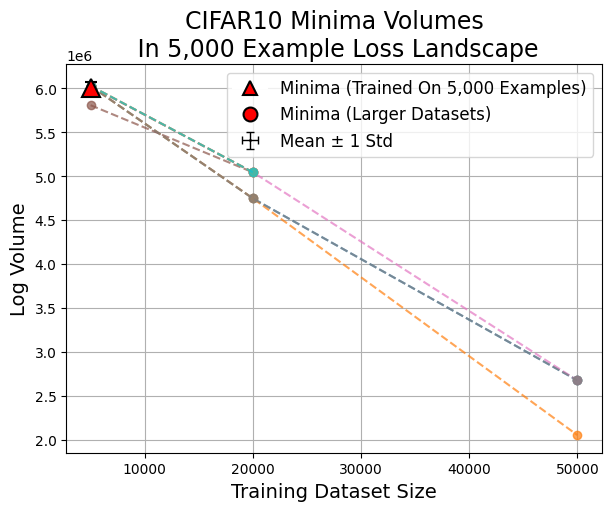

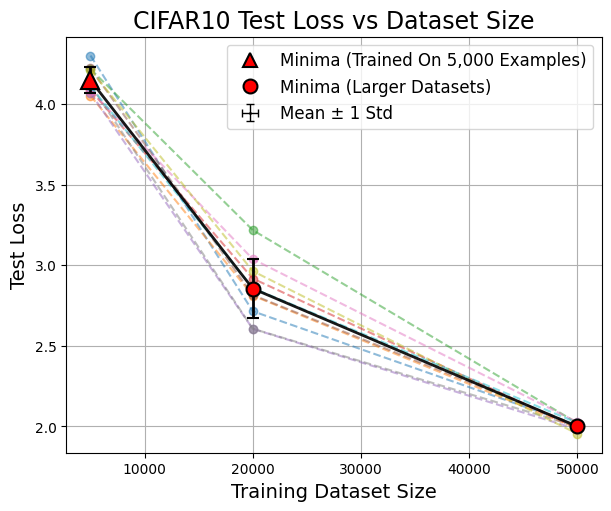

⚠️ Inf detected in x_vals: [6026969.25371825             -inf 2680282.27244384]
⚠️ Inf detected in x_vals: [6026403.59023237 5046647.81685904             -inf]
⚠️ Inf detected in x_vals: [6028418.92743376             -inf             -inf]
⚠️ Inf detected in x_vals: [5808722.21147464 5045786.52899937             -inf]
⚠️ Inf detected in x_vals: [6028733.79330938 5046787.84462181             -inf]
⚠️ Inf detected in x_vals: [6028422.59270461 5046694.17544472             -inf]


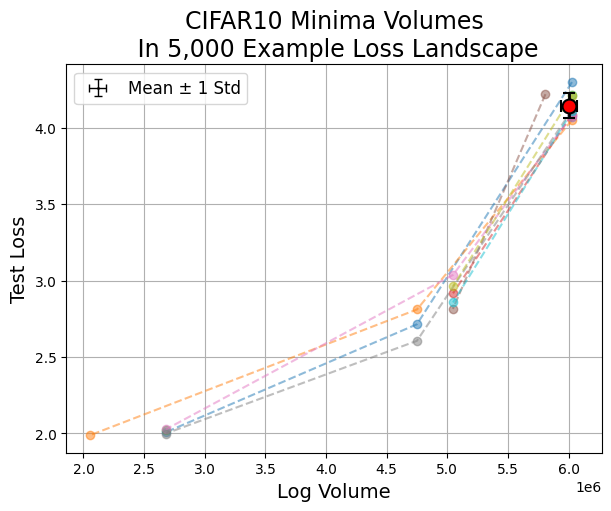

⚠️ Inf detected in y_vals: [6026969.25371825             -inf 2680282.27244384]
⚠️ Inf detected in y_vals: [6026403.59023237 5046647.81685904             -inf]
⚠️ Inf detected in y_vals: [6028418.92743376             -inf             -inf]
⚠️ Inf detected in y_vals: [5808722.21147464 5045786.52899937             -inf]
⚠️ Inf detected in y_vals: [6028733.79330938 5046787.84462181             -inf]
⚠️ Inf detected in y_vals: [6028422.59270461 5046694.17544472             -inf]


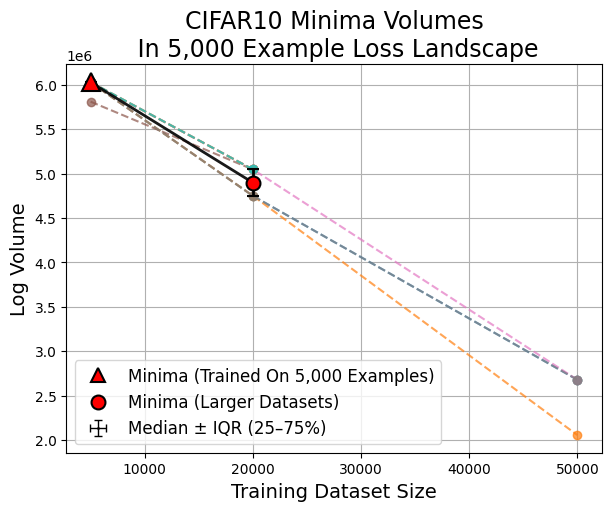

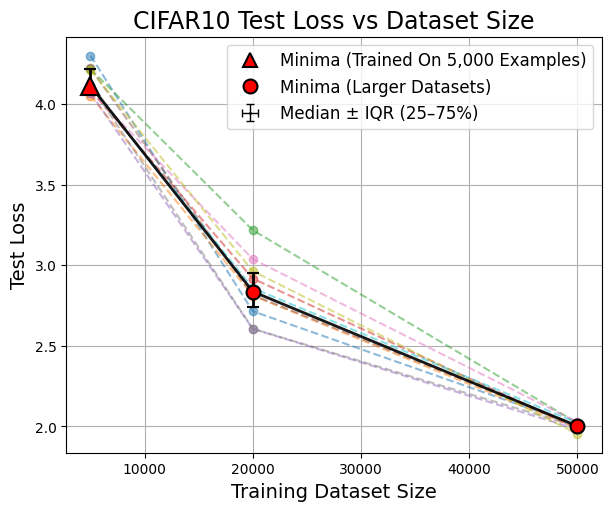

⚠️ Inf detected in x_vals: [6026969.25371825             -inf 2680282.27244384]
⚠️ Inf detected in x_vals: [6026403.59023237 5046647.81685904             -inf]
⚠️ Inf detected in x_vals: [6028418.92743376             -inf             -inf]
⚠️ Inf detected in x_vals: [5808722.21147464 5045786.52899937             -inf]
⚠️ Inf detected in x_vals: [6028733.79330938 5046787.84462181             -inf]
⚠️ Inf detected in x_vals: [6028422.59270461 5046694.17544472             -inf]


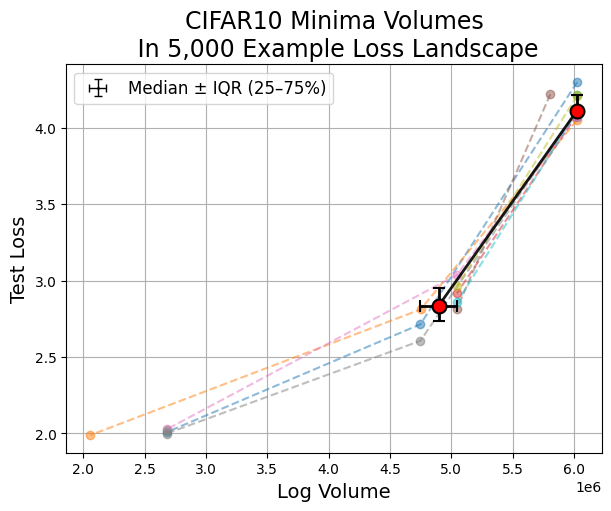


Processing data modification folder: data_49950
Saved data to analysis\data_49950\minima_data.npz
⚠️ Inf detected in y_vals: [-inf]
⚠️ Inf detected in y_vals: [-inf]
⚠️ Inf detected in y_vals: [-inf]
⚠️ Inf detected in y_vals: [-inf]


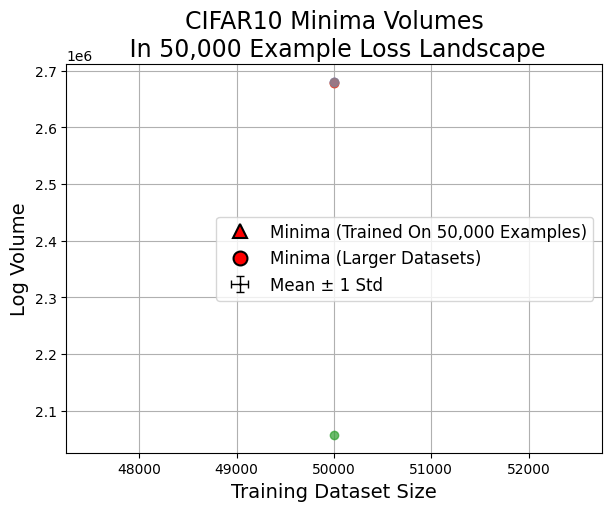

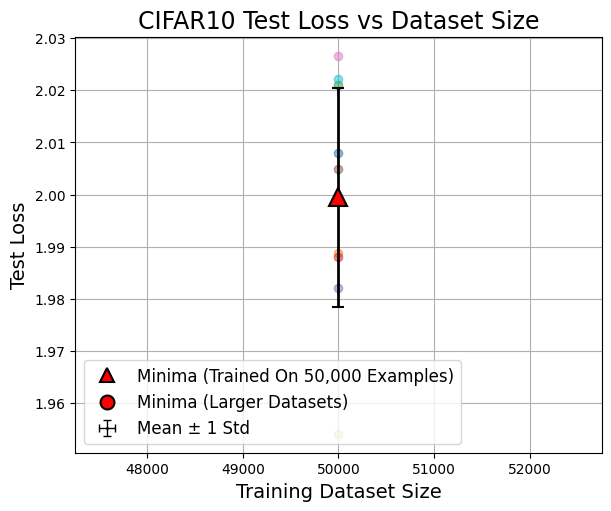

⚠️ Inf detected in x_vals: [-inf]
⚠️ Inf detected in x_vals: [-inf]
⚠️ Inf detected in x_vals: [-inf]
⚠️ Inf detected in x_vals: [-inf]


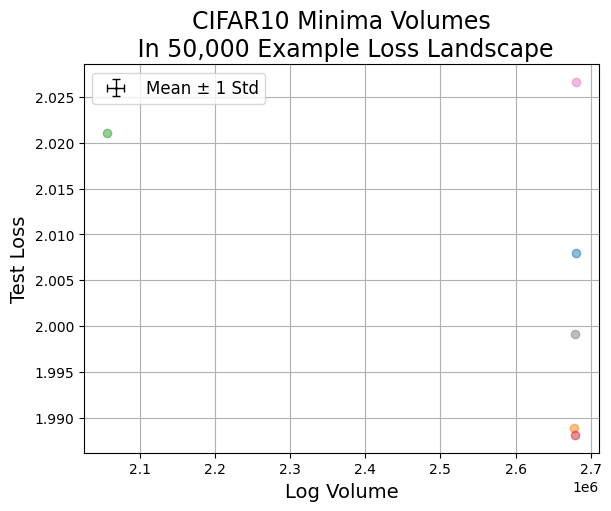

⚠️ Inf detected in y_vals: [-inf]
⚠️ Inf detected in y_vals: [-inf]
⚠️ Inf detected in y_vals: [-inf]
⚠️ Inf detected in y_vals: [-inf]


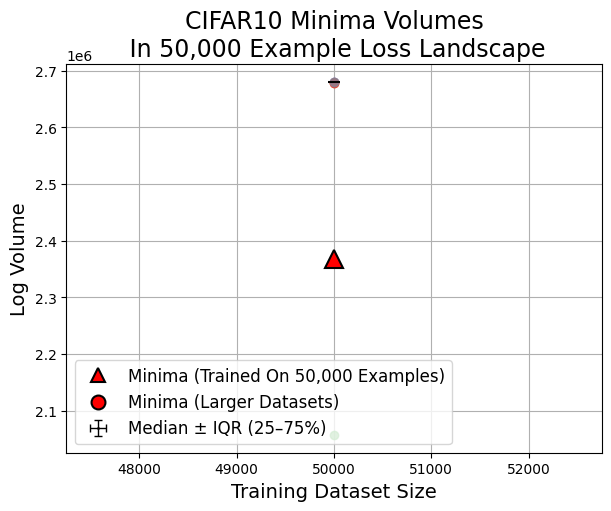

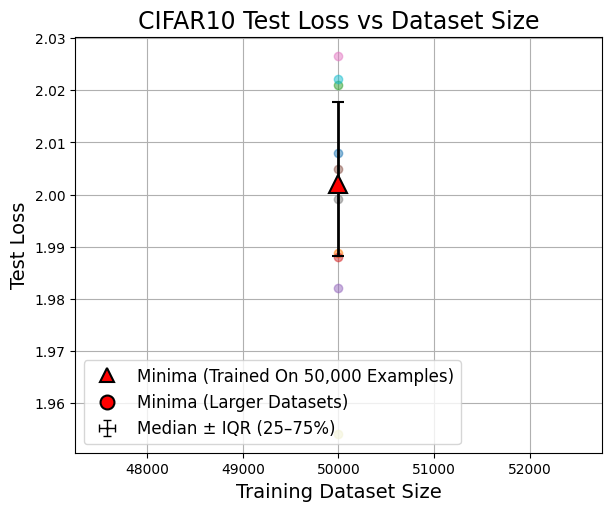

⚠️ Inf detected in x_vals: [-inf]
⚠️ Inf detected in x_vals: [-inf]
⚠️ Inf detected in x_vals: [-inf]
⚠️ Inf detected in x_vals: [-inf]


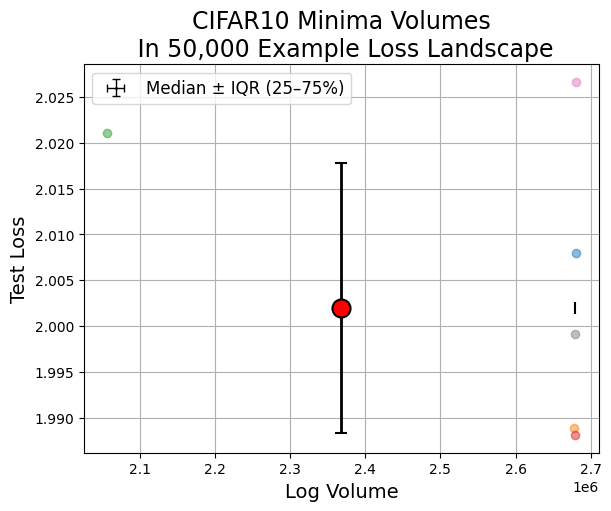

In [3]:
for data_modification in data_modifications:
    print(f"\nProcessing data modification folder: {data_modification}")

    # Create output folder for this data_modification
    save_dir = os.path.join(base_output_dir, data_modification)
    os.makedirs(save_dir, exist_ok=True)

    # Get axis labels and titles
    labels = fixed_landscape_minima_labels(data_modification, base_train_size)

    # Extract minima landscapes
    all_mdl, all_log_rn, all_test_loss = multiple_minima_fixed_landscape(
        experiment_folders, data_modification, loss_value #mdl is modification data level
    )
    number_of_minima = len(all_mdl[0]) # Not used currently

    all_mdl = np.array(all_mdl)
    all_log_rn = np.array(all_log_rn)
    all_test_loss = np.array(all_test_loss)
    
    # Print types and shapes
    #for name, var in [("all_mdl", all_mdl), ("all_log_rn", all_log_rn), ("all_test_loss", all_test_loss)]:
    #    print(f"{name}: type={type(var)}, shape={var.shape}")

    # Save the data using np.savez_compressed
    save_dict = {
        'all_mdl': all_mdl,
        'all_log_rn': all_log_rn,
        'all_test_loss': all_test_loss,
        'data_modification': np.array([data_modification], dtype=object),
        'base_train_size': np.array([base_train_size]),
        'base_shift': np.array([base_shift]),
        'labels': labels
    }
    
    output_path = save_dir
    filename = 'minima_data.npz'
    np.savez_compressed(os.path.join(output_path, filename), **save_dict)
    
    print(f"Saved data to {os.path.join(output_path, filename)}")
    
    # Central tendency runs: mean and median
    for ct, suffix in [("mean", "_avg"), ("median", "_median")]:
        for ranking in [False, True]:
            out_dir = save_dir if not ranking else os.path.join(save_dir, "ranks") #handles ranking
            os.makedirs(out_dir, exist_ok=True)

            # --- Data-level plots: loop through shaded + errorbar ---
            #for avg_style in ["shaded", "errorbar"]:
            #    style_suffix = "_shaded" if avg_style == "shaded" else "_errbar"
            style_suffix = "_errbar"
            avg_style = "errorbar"

            # --- Data level vs Log Volume ---
            plot_fixed_landscape_minima_pair(
                all_mdl, all_log_rn,
                xlabel=labels["xlabel"], ylabel="Log Volume",
                title=f"{problem_name} Minima Volumes\n In {base_train_size + int(data_modification.split("_")[1]):,} Example Loss Landscape",
                #labels["title_volume"],
                log_scale=data_level_log,
                ranking=ranking,
                alpha=0.7,
                output_dir=out_dir,
                filename="data_level_vs_log_volume" + suffix + style_suffix,
                show_plot=not ranking,
                plot_average=True,
                average_style=avg_style,
                central_tendency=ct,
                plot_x_error=(avg_style == "errorbar"),
                xlabel_size=14, ylabel_size=14, title_size=17,
                base_shift=base_shift,
                background_colors=None,#background_colors,     
                natural_minima_loc = 'first',
                natural_label=f"Minima (Trained On {base_train_size + int(data_modification.split("_")[1]):,} Examples)",
                other_label=other_label,               
                natural_marker="^",            
                other_marker="o",               
            )

            # --- Data level vs Test Loss ---
            plot_fixed_landscape_minima_pair(
                all_mdl, all_test_loss,
                xlabel=labels["xlabel"], ylabel="Test Loss",
                title=f"{problem_name} Test Loss vs Dataset Size",#labels["title_volume"],
                log_scale=False,
                ranking=ranking,
                alpha=0.5,
                output_dir=out_dir,
                filename="data_level_vs_test_loss" + suffix + style_suffix,
                show_plot=not ranking,
                plot_average=True,
                average_style=avg_style,
                central_tendency=ct,
                plot_x_error=(avg_style == "errorbar"),
                xlabel_size=14, ylabel_size=14, title_size=17,
                base_shift=base_shift,
                background_colors=None,#background_colors,     
                natural_minima_loc = 'first',
                natural_label=f"Minima (Trained On {base_train_size + int(data_modification.split("_")[1]):,} Examples)", 
                other_label=other_label,               
                natural_marker="^",            
                other_marker="o",               
            )

            # --- Log Volume vs Test Loss ---
            # Only error bar version (no shaded version)
            plot_fixed_landscape_minima_pair(
                all_log_rn, all_test_loss,
                xlabel="Log Volume", ylabel="Test Loss",
                title=f"{problem_name} Minima Volumes\n In {base_train_size + int(data_modification.split("_")[1]):,} Example Loss Landscape",
                #labels["title_volume"],
                log_scale=False,
                ranking=ranking,
                alpha=0.5,
                output_dir=out_dir,
                filename="log_volume_vs_test_loss" + suffix + "_errbar",
                show_plot=not ranking,
                plot_average=True,
                average_style="errorbar",
                central_tendency=ct,
                plot_x_error=True,  # allow x-error bars
                xlabel_size=14, ylabel_size=14, title_size=17,
                background_colors=None,#background_colors,              
                #natural_minima_loc = 'last',
                #natural_label=f"Minima (Trained On {base_train_size + int(data_modification.split("_")[1]):,} Examples)", 
                #other_label=other_label,               
                #natural_marker="^",            
                other_marker="o",               
            )

# Aggregrate Test Accuracy

Test accuracy vs dataset size across all plots.

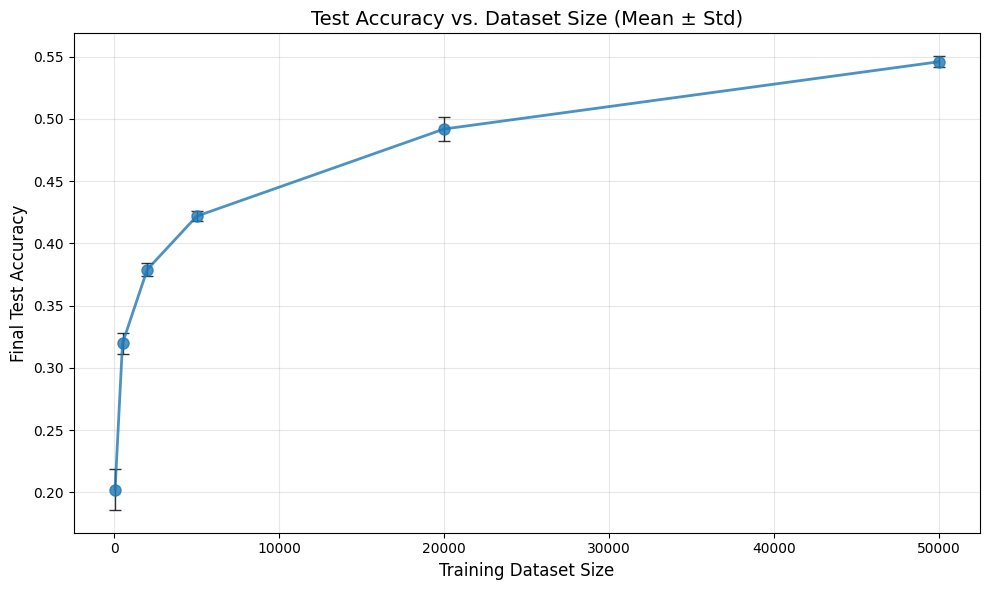

✅ Plot saved to analysis\test_acc_plot.png
✅ Aggregated data saved to analysis\test_acc.npz


In [4]:
missing_folders = [folder for folder in experiment_folders
                   if not os.path.exists(os.path.join(folder, "test_accuracies.npz"))]

if missing_folders:
    print(f"⚠️ Skipping aggregation — missing test_accuracies.npz in: {missing_folders}")
else:
    # ---------- Step 2: Load all data ----------
    all_dataset_sizes = []
    all_accuracies = []

    for folder in experiment_folders:
        file_path = os.path.join(folder, "test_accuracies.npz")
        data = np.load(file_path)
        all_dataset_sizes.extend(data["dataset_sizes"])
        all_accuracies.extend(data["final_test_accuracies"])

    all_dataset_sizes = np.array(all_dataset_sizes)
    all_accuracies = np.array(all_accuracies)

    # ---------- Step 3: Group by dataset size ----------
    grouped_data = defaultdict(list)
    for size, acc in zip(all_dataset_sizes, all_accuracies):
        grouped_data[size].append(acc)

    sorted_sizes = np.array(sorted(grouped_data.keys()))
    mean_accs = np.array([np.mean(grouped_data[size]) for size in sorted_sizes])
    std_accs = np.array([np.std(grouped_data[size]) for size in sorted_sizes])

    # ---------- Step 4: Plot with error bars ----------
    plt.figure(figsize=(10, 6))
    plt.errorbar(
        sorted_sizes, mean_accs, yerr=std_accs,
        fmt='o-', capsize=4, linewidth=2, markersize=8,
        color='tab:blue', ecolor='black', elinewidth=1, alpha=0.8
    )

    plt.xlabel("Training Dataset Size", fontsize=12)
    plt.ylabel("Final Test Accuracy", fontsize=12)
    plt.title("Test Accuracy vs. Dataset Size (Mean ± Std)", fontsize=14)
    plt.grid(True, alpha=0.3)
    #plt.ylim((0.5, 1.0))
    plt.tight_layout()

    os.makedirs(base_output_dir, exist_ok=True)
    plot_path = os.path.join(base_output_dir, "test_acc_plot.png")
    plt.savefig(plot_path, bbox_inches="tight")
    plt.show()
    plt.close()

    print(f"✅ Plot saved to {plot_path}")

    # ---------- Step 5: Save combined data ----------
    save_path = os.path.join(base_output_dir, "test_acc.npz")
    np.savez(
        save_path,
        dataset_sizes=sorted_sizes,
        mean_accuracies=mean_accs,
        std_accuracies=std_accs,
        all_dataset_sizes=all_dataset_sizes,
        all_accuracies=all_accuracies
    )
    print(f"✅ Aggregated data saved to {save_path}")

# Comparisons Across Loss Landscapes



Here, we track the performance of all models across all loss landscapes.

Collected results for 10 experiments
Collected results for 10 experiments
Collected results for 10 experiments
Collected results for 10 experiments
Collected results for 10 experiments
Collected results for 10 experiments
Model_0: first exceedance at index 50 (value=0.2502869665622711, threshold=0.1)
Appended cutoff for model_0_data_10 | target=0, cutoff_idx=50
Model_0: first exceedance at index 50 (value=0.13717588782310486, threshold=0.1)
Appended cutoff for model_1_data_11 | target=0, cutoff_idx=50
Model_0: first exceedance at index 53 (value=0.37689468264579773, threshold=0.1)
Appended cutoff for model_2_data_12 | target=0, cutoff_idx=53
Model_0: first exceedance at index 50 (value=0.24722015857696533, threshold=0.1)
Appended cutoff for model_3_data_13 | target=0, cutoff_idx=50
Model_0: first exceedance at index 50 (value=0.18926391005516052, threshold=0.1)
Appended cutoff for model_4_data_14 | target=0, cutoff_idx=50
Model_0: first exceedance at index 50 (value=0.2688656151294708,

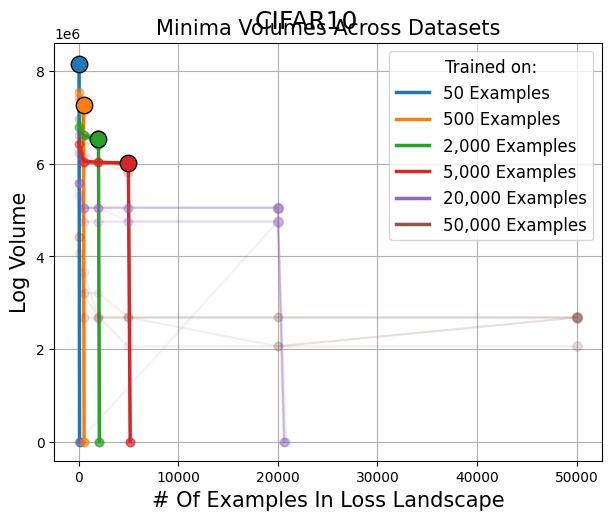

In [5]:
# For the poisoning experiments, this plot has no meaning

labels = varying_landscape_minima_labels(
    data_modification_folder=data_modifications[0], # Random choice to grab datatype from
    base_train_size=base_train_size,
)

results_dict = model_volume_across_targets(
    target_model_data_levels=model_data_sizes,
    loss_value=loss_value,
    experiment_folders=experiment_folders
)
results_with_cutoff = append_cutoff_points(results_dict, threshold=loss_value, base_dir=".")
save_results_dict_npz(results_with_cutoff, "analysis/volumes_across_datasets.npz")

found_minima_vol, found_minima_dataset = plot_minima_volume_vs_data_level(
    results_dict = results_with_cutoff,
    data_type=labels["data_type"],        
    base_train_size=base_train_size, 
    xlabel=labels["xlabel"],
    ylabel="Log Volume",
    suptitle=f"{problem_name}",
    title=f"Minima Volumes Across Datasets",
    log_scale = data_level_log,
    alpha=0.1,
    plot_average=True,
    output_dir=base_output_dir, filename="log_volumes_vs_data_levels",
    xlabel_size=15, ylabel_size=15, title_size=15, suptitle_size=18,
)

Plotting minima trained with 0 additional data points
Plotting minima trained with 450 additional data points
Plotting minima trained with 1950 additional data points
Plotting minima trained with 4950 additional data points
Plotting minima trained with 19950 additional data points
Plotting minima trained with 49950 additional data points


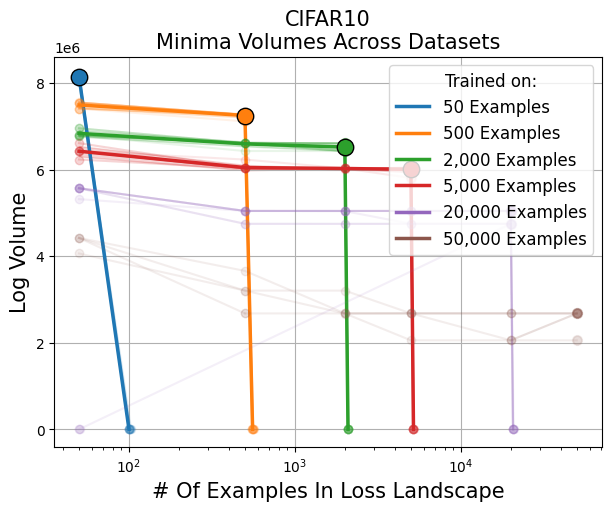

In [6]:
_, _, = plot_minima_volume_vs_data_level(
    results_dict = results_with_cutoff,
    data_type=labels["data_type"],          
    base_train_size=base_train_size, 
    xlabel=labels["xlabel"],
    ylabel="Log Volume",
    #suptitle=f"{problem_name}",
    title=f"{problem_name}\nMinima Volumes Across Datasets",
    log_scale = True,
    alpha=0.1,
    plot_average=True,
    output_dir=base_output_dir, filename="log_volumes_vs_data_levels_log",
    xlabel_size=15, ylabel_size=15, title_size=15, suptitle_size=18,
)

## Customized Plot

Plotting minima trained with 0 additional data points
Plotting minima trained with 450 additional data points
Plotting minima trained with 1950 additional data points
Plotting minima trained with 4950 additional data points
Plotting minima trained with 19950 additional data points
Plotting minima trained with 49950 additional data points


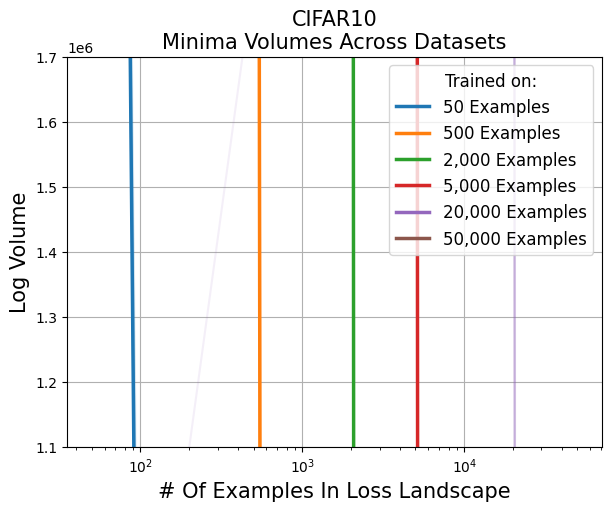

In [7]:
# We experiment a little with making customized graphs.

_, _, = plot_minima_volume_vs_data_level(
    results_dict = results_with_cutoff,
    data_type=labels["data_type"],          
    base_train_size=base_train_size, 
    xlabel=labels["xlabel"],
    ylabel="Log Volume",
    #suptitle=f"{problem_name}",
    title=f"{problem_name}\nMinima Volumes Across Datasets",
    log_scale = True,
    alpha=0.1,
    plot_average=True,
    output_dir=base_output_dir, filename="log_volumes_vs_data_levels_log_custom",
    xlabel_size=15, ylabel_size=15, title_size=15, suptitle_size=18,
    ylim = (1100000, 1700000)
)

Fitting to y = a * log(x) + log(k) 
Exponent a = nan
Log k = nan
y = nan × log(x) + nan
The exponent divided by the number of parameters is  nan


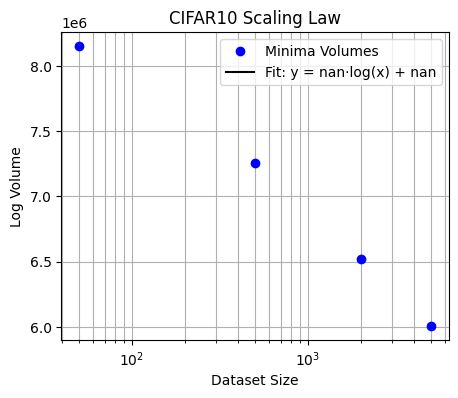

Figure saved to: analysis\scaling.png


In [8]:
# Convert to numpy arrays
x = np.array(found_minima_vol)
y = np.array(found_minima_dataset)

# Fit a linear relationship: y = n * log(x) + log(k)
coefficients = np.polyfit(np.log(x), y, 1)

# Extract the exponent n and constant log(k)
exponent = coefficients[0]  # This is your exponent!
log_k = coefficients[1]  # log of the constant

print(f"Fitting to y = a * log(x) + log(k) ")
print(f"Exponent a = {exponent:.4f}")
print(f"Log k = {log_k:.4f}")
#print(f"Power law relationship: z = {k:.4f} × x^{n:.4f}")
print(f"y = {exponent:.4f} × log(x) + {log_k:.4f}")

print("The exponent divided by the number of parameters is ", exponent/num_params)

# Create the fit line for plotting
x_fit = np.linspace(min(x), max(x), 100)
y_fit = exponent * np.log(x_fit) + log_k

# Plot
plt.figure(figsize=(5, 4))
plt.plot(x, y, 'bo', label="Minima Volumes")
plt.plot(x_fit, y_fit, 'k-', label=f'Fit: y = {exponent:.3f}·log(x) + {log_k:.3f}')
#plt.plot(xs, a*xs + b, '--', label=f"Fit: y = {np.exp(b):.2f} * x^{a:.2f}")
#plt.loglog(xs, fit_line, '--', label=f"Fit: y = {np.exp(b):.2f} * x^{a:.2f}")
plt.xscale("log")
plt.xlabel("Dataset Size")
plt.ylabel("Log Volume")
plt.title(f"{problem_name} Scaling Law")
plt.legend()
plt.grid(True, which="both")
output_path = os.path.join(base_output_dir, "scaling.png")
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.show()
plt.close()  # Close the figure to free memory

print(f"Figure saved to: {output_path}")